<a href="https://colab.research.google.com/github/thekripaverse/CIFAR-10-Image-Classification-using-TensorFlow/blob/main/cifar10_data_analysis_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('Training data:', x_train.shape)
print('Test data:', x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data: (50000, 32, 32, 3)
Test data: (10000, 32, 32, 3)


In [4]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


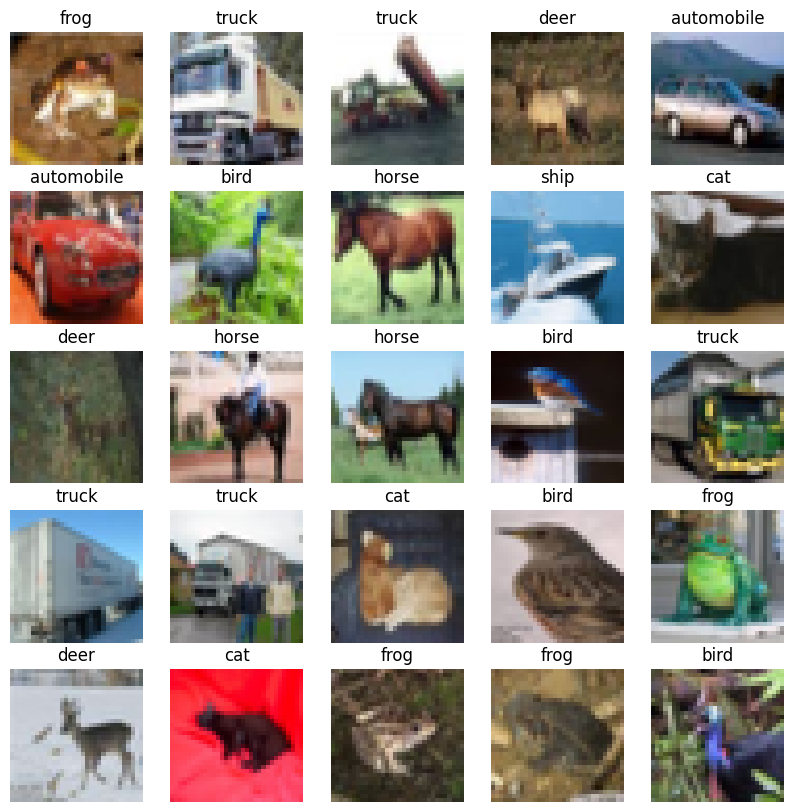

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

In [6]:
print('Min:', x_train.min())
print('Max:', x_train.max())
print('Mean:', x_train.mean())

Min: 0
Max: 255
Mean: 120.70756512369792


In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0
print('Normalized range:', x_train.min(), x_train.max())

Normalized range: 0.0 1.0


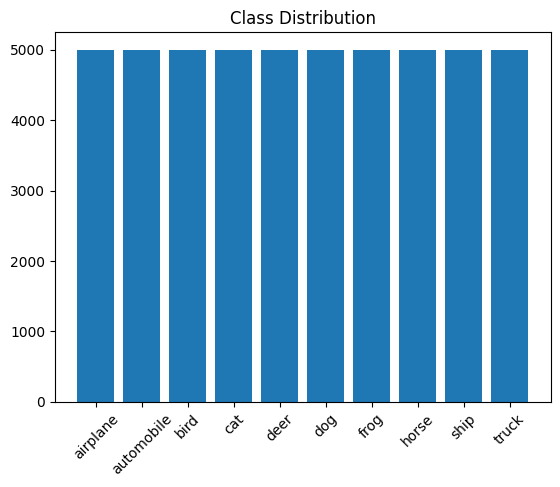

In [8]:
import collections
counter = collections.Counter(y_train.flatten())
plt.bar(class_names, counter.values())
plt.xticks(rotation=45)
plt.title('Class Distribution')
plt.show()

In [9]:
mean = np.mean(x_train, axis=(0,1,2))
std = np.std(x_train, axis=(0,1,2))
print('Mean:', mean)
print('Std:', std)

Mean: [0.49139968 0.48215841 0.44653091]
Std: [0.24703223 0.24348513 0.26158784]


In [10]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train_cat.shape)

(50000, 10)


In [12]:
from tensorflow.keras import models, layers

In [19]:
model = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [21]:
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(x_test, y_test)
)


Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - accuracy: 0.3213 - loss: 1.8488 - val_accuracy: 0.4954 - val_loss: 1.4258
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.5056 - loss: 1.3889 - val_accuracy: 0.5444 - val_loss: 1.3018
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.5565 - loss: 1.2481 - val_accuracy: 0.5663 - val_loss: 1.2317
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.5814 - loss: 1.1797 - val_accuracy: 0.5790 - val_loss: 1.1885
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - accuracy: 0.6082 - loss: 1.1146 - val_accuracy: 0.5847 - val_loss: 1.1773
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.6218 - loss: 1.0786 - val_accuracy: 0.6009 - val_loss: 1.1366
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6298 - loss: 1.0570 - val_accuracy: 0.5942 - val_loss: 1.1531
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.6438 - loss: 1.0235 - 

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6170 - loss: 1.0936
Test accuracy: 0.6169999837875366
